# ***phần A***

In [37]:
import pandas as pd

# Tạo DataFrame từ bảng trong ảnh
data = {
    "Employee_ID": ["E001", "E002", "E003", "E004", "E005", "E006", "E007", "E008", "E009", "E010",
                    "E011", "E012", "E013", "E014", "E015", "E016", "E017", "E018", "E019", "E020"],
    "Department": ["Sales", "IT", "HR", "Sales", "IT", "HR", "Sales", "IT", "HR", "Sales",
                   "IT", "HR", "Sales", "IT", "HR", "Sales", "Sales", "HR", "Sales", "IT"],
    "Performance": [88, None, 75, 92, 68, 85, None, 79, 90, 73,
                    86, None, 95, 70, 82, 78, 89, 77, 87, 93],
    "Hours_Worked": [40, 45, 38, 42, None, 39, 41, 44, 37, 40,
                     46, 38, 43, None, 39, 41, 45, 37, None, 44],
    "Training_Hours": [5, 3, None, 6, 4, 5, 3, 4, None, 5,
                       2, 6, 7, 3, 5, 4, None, 3, 6, 5],
    "Gender": ["Male", "Female", "Male", "Female", None, "Male", "Female", "Male", "Female", "Male",
               "Female", "Male", "Female", "Male", None, "Female", "Male", "Female", "Male", "Female"],
    "Location": ["Site_A", "Site_B", "Site_A", "Site_C", "Site_B", "Site_A", "Site_C", "Site_B", "Site_A", "Site_C",
                 "Site_B", "Site_A", "Site_C", "Site_B", "Site_A", "Site_C", "Site_B", "Site_A", "Site_C", "Site_B"]
}

df = pd.DataFrame(data)
df


,Employee_ID,Department,Performance,Hours_Worked,Training_Hours,Gender,Location
0,E001,Sales,88.0,40.0,5.0,Male,Site_A
1,E002,IT,NaN,45.0,3.0,Female,Site_B
2,E003,HR,75.0,38.0,NaN,Male,Site_A
3,E004,Sales,92.0,42.0,6.0,Female,Site_C
4,E005,IT,68.0,NaN,4.0,None,Site_B
5,E006,HR,85.0,39.0,5.0,Male,Site_A
6,E007,Sales,NaN,41.0,3.0,Female,Site_C
7,E008,IT,79.0,44.0,4.0,Male,Site_B
8,E009,HR,90.0,37.0,NaN,Female,Site_A
9,E010,Sales,73.0,40.0,5.0,Male,Site_C


# ***Phần B: Câu hỏi kiểm tra***

# 1

In [38]:
missing_percentage = df.isnull().mean() * 100
missing_percentage



,0
Employee_ID,0.0
Department,0.0
Performance,15.0
Hours_Worked,15.0
Training_Hours,15.0
Gender,10.0
Location,0.0


Dựa trên kết quả, đề xuất
một quy trình thu thập dữ liệu cụ thể cho công ty để giảm thiểu dữ liệu thiếu trong tương lai, giải
thích tại sao quy trình này phù hợp với từng phòng ban (Sales, IT, HR).

2

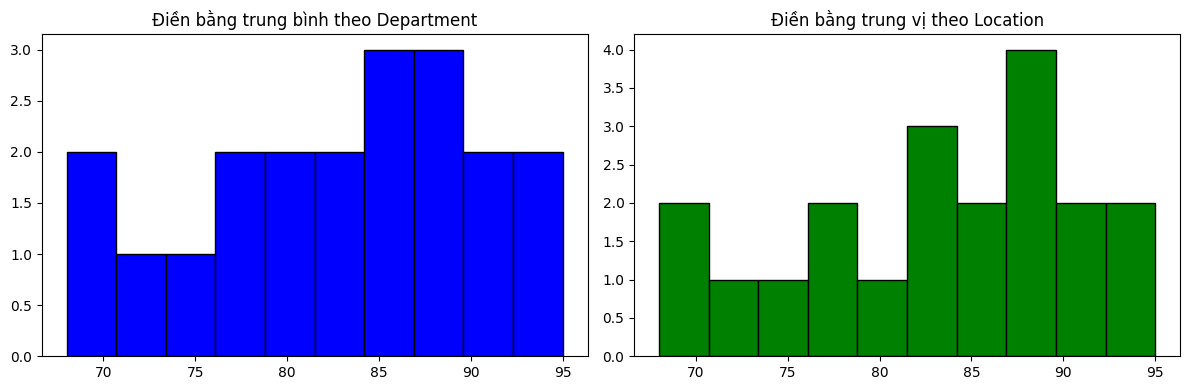

In [39]:

import numpy as np
import matplotlib.pyplot as plt

# Điền Performance bằng trung bình của từng Department
df["Performance_by_dept"] = df["Performance"].copy()
df["Performance_by_dept"] = df["Performance_by_dept"].fillna(
    df.groupby("Department")["Performance"].transform("mean")
)

# Điền Performance bằng trung vị của từng Location
df["Performance_by_loc"] = df["Performance"].copy()
df["Performance_by_loc"] = df["Performance_by_loc"].fillna(
    df.groupby("Location")["Performance"].transform("median")
)

# Vẽ histogram so sánh 2 cách điền
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df["Performance_by_dept"], bins=10, color='blue', edgecolor='black')
plt.title("Điền bằng trung bình theo Department")

plt.subplot(1, 2, 2)
plt.hist(df["Performance_by_loc"], bins=10, color='green', edgecolor='black')
plt.title("Điền bằng trung vị theo Location")

plt.tight_layout()
plt.show()

phương pháp điền giá trị thiếu theo Location giúp dữ liệu trở nên chính xác và thực tế hơn, phản ánh đúng những ảnh hưởng từ môi trường làm việc đến hiệu suất, từ đó có thể giúp đưa ra các quyết định và chiến lược phù hợp hơn cho từng khu vực làm việc trong công ty.

3

In [40]:
# Bỏ giá trị thiếu để tính toán chính xác
hours = df["Hours_Worked"].dropna()

# Tính độ lệch chuẩn
std_hours = np.std(hours)
median_hours = np.median(hours)

print(f"Độ lệch chuẩn: {std_hours:.2f}")
print(f"Trung vị (Median): {median_hours}")

Độ lệch chuẩn: 2.87
Trung vị (Median): 41.0


Chính sách bỏ giá trị thiếu và tính toán chính xác độ lệch chuẩn và trung vị giúp cải thiện khả năng phân tích và hiểu rõ hơn về dữ liệu. Điều này có thể giúp các nhà quản lý đưa ra quyết định thông minh hơn, cải thiện hiệu suất tổng thể của công ty bằng cách tối ưu hóa các yếu tố như giờ làm việc và phân bổ tài nguyên hợp lý hơn.

4

In [41]:
# Đảm bảo đã xử lý giá trị thiếu trước khi tính correlation
df_corr = df.copy()
df_corr["Performance"] = df_corr["Performance"].fillna(
    df_corr.groupby("Location")["Performance"].transform("median")
)
df_corr["Hours_Worked"] = df_corr["Hours_Worked"].fillna(
    df_corr.groupby("Location")["Hours_Worked"].transform("median")
)

# Tính correlation giữa Hours_Worked và Performance theo từng Location
correlations = df_corr.groupby("Location")[["Hours_Worked", "Performance"]].corr().iloc[0::2,-1]
correlations = correlations.reset_index().pivot(index="Location", columns="level_1", values="Performance")
correlations.columns = ["Correlation"]
correlations


,Correlation
Location,
Site_A,0.277985
Site_B,-0.126747
Site_C,0.888090


Dựa trên correlation giữa "Hours_Worked" và "Performance" tại từng Location, các chiến lược phân bổ công việc có thể được điều chỉnh sao cho phù hợp với đặc điểm và nhu cầu của từng khu vực. Việc tăng cường giờ làm việc ở các Location có correlation cao và tối ưu hóa hỗ trợ ở các Location có correlation thấp sẽ giúp tối ưu hóa hiệu suất toàn công ty.

5

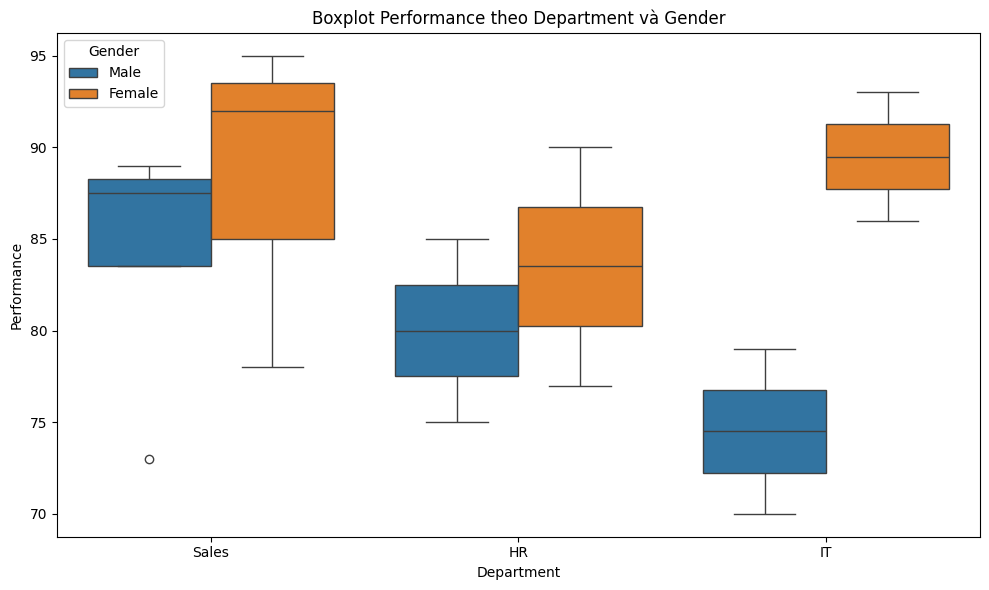

,Employee_ID,Department,Performance,Hours_Worked,Training_Hours,Gender,Location,Performance_by_dept,Performance_by_loc
9,E010,Sales,73.0,40.0,5.0,Male,Site_C,73.0,73.0


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loại bỏ các dòng thiếu giá trị cần thiết
df_box = df.dropna(subset=["Performance", "Department", "Gender"])

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_box, x="Department", y="Performance", hue="Gender")
plt.title("Boxplot Performance theo Department và Gender")
plt.tight_layout()
plt.show()
outliers = []

# Lặp theo từng nhóm Department + Gender
grouped = df_box.groupby(["Department", "Gender"])
for (dept, gender), group in grouped:
    Q1 = group["Performance"].quantile(0.25)
    Q3 = group["Performance"].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_rows = group[(group["Performance"] < lower_bound) | (group["Performance"] > upper_bound)]
    outliers.append(outlier_rows)

# Gộp lại thành DataFrame
outliers_df = pd.concat(outliers)
outliers_df


Kế hoạch phỏng vấn cá nhân với các nhân viên có hiệu suất ngoài mức bình thường (outliers) sẽ giúp công ty hiểu rõ nguyên nhân của những sự khác biệt này. Điều này không chỉ giúp giải quyết các vấn đề riêng biệt của từng nhân viên mà còn cải thiện chính sách quản trị nhân sự tổng thể, từ đó tối ưu hóa hiệu suất công việc và tăng cường sự hài lòng của nhân viên.

6

In [43]:
# Tạo cột Efficiency
df['Efficiency'] = df['Performance'] / df['Hours_Worked']

# Tìm nhân viên có Efficiency cao nhất
highest_efficiency_employee = df.loc[df['Efficiency'].idxmax()]

highest_efficiency_employee

,8
Employee_ID,E009
Department,HR
Performance,90.0
Hours_Worked,37.0
Training_Hours,NaN
Gender,Female
Location,Site_A
Performance_by_dept,90.0
Performance_by_loc,90.0
Efficiency,2.432432


Đề xuất phần thưởng hoặc chương trình đào tạo:
Dựa trên việc xác định nhân viên có Efficiency cao nhất, bạn có thể đề xuất một phần thưởng hoặc chương trình đào tạo như sau:

1. Phần thưởng cho nhân viên có Efficiency cao nhất:
Tiền thưởng hoặc phụ cấp: Để khuyến khích nhân viên tiếp tục duy trì hiệu suất cao, công ty có thể tặng tiền thưởng hoặc phụ cấp đặc biệt cho nhân viên này.

Lãnh đạo/Thăng chức: Nếu nhân viên này có tiềm năng lãnh đạo, có thể trao cho họ một cơ hội thăng chức hoặc giao thêm trách nhiệm lãnh đạo để họ phát huy tối đa khả năng.

Chế độ đãi ngộ đặc biệt: Tạo ra những đãi ngộ đặc biệt, như những ngày nghỉ phép bổ sung, hoặc các phúc lợi khác để họ cảm thấy được công nhận và đánh giá cao.

2. Chương trình đào tạo cho nhân viên có Efficiency cao nhất:
Đào tạo chuyên sâu: Đưa nhân viên này tham gia các khóa đào tạo chuyên sâu về quản lý thời gian, kỹ năng lãnh đạo, hoặc các kỹ năng nâng cao trong công việc để phát triển khả năng lãnh đạo và truyền đạt kinh nghiệm cho đội ngũ khác.

Chia sẻ kinh nghiệm: Mời nhân viên này làm diễn giả hoặc chia sẻ kinh nghiệm về việc quản lý công việc hiệu quả với các đồng nghiệp khác, giúp tăng cường sự học hỏi và nâng cao hiệu quả công việc của cả nhóm.

3. Tác động đến động lực làm việc của nhân viên khác:
Tạo động lực và cảm hứng: Khi nhân viên khác thấy rằng công ty đánh giá cao những người có hiệu suất cao và trao thưởng xứng đáng, họ sẽ cảm thấy được khích lệ và có thêm động lực làm việc để đạt được kết quả tốt hơn.

Cải thiện môi trường làm việc: Những nhân viên có hiệu suất cao có thể trở thành hình mẫu cho những nhân viên khác, thúc đẩy sự cạnh tranh lành mạnh và tạo ra một môi trường làm việc tích cực hơn.

Khuyến khích chia sẻ kiến thức: Việc trao phần thưởng hoặc cơ hội đào tạo cho nhân viên có Efficiency cao nhất sẽ tạo cơ hội để họ chia sẻ kinh nghiệm và kiến thức, giúp các nhân viên khác học hỏi và cải thiện hiệu suất của chính họ.

7

In [44]:
# Điền giá trị thiếu cho cột 'Gender' bằng mode
mode_gender = df['Gender'].mode()[0]
df['Gender'] = df['Gender'].fillna(mode_gender)

# Tính tỷ lệ nhân viên nữ (Gender = Female) trong từng Department
female_ratio_per_department = df.groupby('Department')['Gender'].apply(lambda x: (x == 'Female').mean())

female_ratio_per_department


,Gender
Department,
HR,0.500000
IT,0.666667
Sales,0.500000


Đề xuất chính sách đa dạng giới tính cho công ty:
Dựa trên kết quả tỷ lệ nhân viên nữ trong từng phòng ban, công ty có thể áp dụng các chính sách để nâng cao sự đa dạng giới tính. Dưới đây là một số đề xuất:

1. Chính sách tuyển dụng cân bằng giới tính:
Mục tiêu: Công ty nên tạo ra các chương trình tuyển dụng có sự ưu tiên để đảm bảo tỷ lệ giới tính cân bằng trong các phòng ban.

Cách thực hiện:

Tăng cường chiến dịch tuyển dụng và giới thiệu việc làm cho phụ nữ, đặc biệt trong các phòng ban có tỷ lệ nữ thấp.

Cung cấp các khóa đào tạo cho các ứng viên nữ để chuẩn bị cho các vị trí quan trọng trong công ty, đặc biệt là ở các bộ phận như IT, Sales nơi có thể ít nữ giới hơn.

2. Chính sách phát triển nghề nghiệp:
Mục tiêu: Đảm bảo rằng nữ nhân viên có cơ hội phát triển nghề nghiệp như nam giới, đặc biệt trong các lĩnh vực ít có sự tham gia của nữ giới.

Cách thực hiện:

Đưa ra các chương trình đào tạo và mentoring cho nữ nhân viên để phát triển kỹ năng và giúp họ tiến xa hơn trong sự nghiệp.

Tạo các cơ hội thăng tiến cho phụ nữ, đảm bảo họ có cơ hội nhận các vị trí lãnh đạo.

3. Chính sách hỗ trợ cân bằng công việc và cuộc sống:
Mục tiêu: Hỗ trợ nữ nhân viên duy trì sự cân bằng giữa công việc và cuộc sống cá nhân, điều này đặc biệt quan trọng đối với những nhân viên có gia đình hoặc con nhỏ.

Cách thực hiện:

Cung cấp các chế độ linh hoạt về thời gian làm việc hoặc công việc từ xa, giúp nữ nhân viên dễ dàng duy trì sự cân bằng giữa công việc và gia đình.

Tạo ra môi trường làm việc hỗ trợ mẹ bỉm sữa với các khu vực chăm sóc trẻ em trong công ty hoặc chế độ nghỉ thai sản đầy đủ.

4. Chính sách đảm bảo sự công bằng trong văn hóa tổ chức:
Mục tiêu: Công ty cần tạo ra một môi trường làm việc mà mọi nhân viên đều được đối xử công bằng, không phân biệt giới tính.

Cách thực hiện:

Cung cấp các chương trình giáo dục và đào tạo về sự đa dạng giới tính và chống phân biệt giới tính tại nơi làm việc.

Khuyến khích môi trường làm việc cởi mở, nơi mà phụ nữ và nam giới đều có thể thể hiện ý kiến, đóng góp vào các quyết định công ty.

Tác động của chính sách đa dạng giới tính đến văn hóa tổ chức:
Tăng cường sự sáng tạo và đổi mới:

Khi có sự đa dạng giới tính, các quan điểm và cách giải quyết vấn đề sẽ trở nên phong phú hơn. Phụ nữ và nam giới có thể có các cách tiếp cận khác nhau đối với công việc, giúp cải thiện sự sáng tạo và khả năng đổi mới trong công ty.

Cải thiện sự hài lòng và gắn kết công việc:

Môi trường công bằng và hỗ trợ sự đa dạng giới tính sẽ giúp nhân viên cảm thấy được tôn trọng và có cơ hội phát triển. Điều này dẫn đến sự hài lòng và gắn kết công việc cao hơn.

Xây dựng hình ảnh công ty tích cực:

Một công ty có chính sách đa dạng giới tính tốt sẽ thu hút nhân tài từ nhiều nguồn và xây dựng được hình ảnh công ty trách nhiệm xã hội và thân thiện với nhân viên.

Cải thiện năng suất làm việc:

Một môi trường làm việc đa dạng và công bằng giúp mọi nhân viên đều cảm thấy được công nhận và có động lực làm việc, điều này trực tiếp ảnh hưởng đến hiệu quả công việc và năng suất chung của công ty.

8

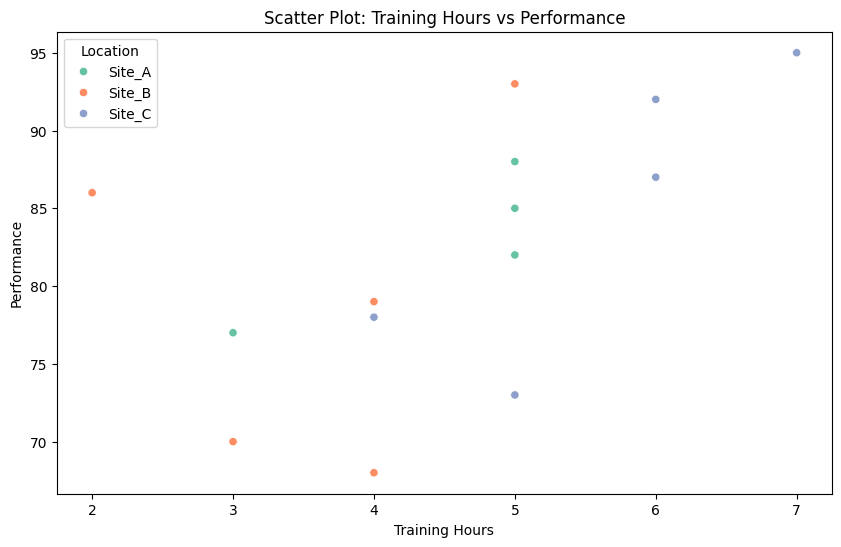

In [45]:
# Vẽ scatter plot giữa Training_Hours và Performance, tô màu theo Location
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Training_Hours', y='Performance', hue='Location', palette='Set2')

# Thêm tiêu đề và nhãn cho trục
plt.title('Scatter Plot: Training Hours vs Performance')
plt.xlabel('Training Hours')
plt.ylabel('Performance')

# Hiển thị biểu đồ
plt.legend(title='Location')
plt.show()

1. Location_A:
Quan sát: Nhân viên ở Location_A có sự phân bố khá rộng, không rõ ràng giữa thời gian đào tạo và hiệu suất.

Đề xuất:

Tăng cường chương trình đào tạo cho những nhân viên có thời gian đào tạo thấp nhưng hiệu suất chưa cao.

Cung cấp đào tạo chuyên sâu cho các nhân viên có thời gian đào tạo cao nhưng hiệu suất không tương xứng.

Phân tích lý do vì sao một số nhân viên có thời gian đào tạo lâu nhưng không đạt hiệu suất cao để có kế hoạch đào tạo điều chỉnh phù hợp.

Mục tiêu: Cải thiện đồng đều hiệu suất của nhân viên và tối ưu hóa việc phân bổ thời gian đào tạo sao cho phù hợp.

2. Location_B:
Quan sát: Nhân viên ở Location_B có xu hướng có thời gian đào tạo vừa phải với hiệu suất trung bình cao.

Đề xuất:

Tiếp tục duy trì chương trình đào tạo hiện tại vì hiệu suất của nhân viên ở Location_B đã khá ổn định.

Cung cấp thêm các khóa đào tạo nâng cao cho nhóm nhân viên có hiệu suất cao, giúp họ phát triển kỹ năng và giữ vững vị trí dẫn đầu.

Tăng cường các khóa học mềm (soft skills) như giao tiếp và lãnh đạo cho các nhân viên có hiệu suất cao, giúp họ phát triển thêm khả năng lãnh đạo.

Mục tiêu: Giữ vững hiệu suất cao và phát triển kỹ năng của đội ngũ.

3. Location_C:
Quan sát: Ở Location_C, hầu hết nhân viên có hiệu suất cao, nhưng một số nhân viên có ít thời gian đào tạo hơn.

Đề xuất:

Tăng cường đào tạo cho những nhân viên có ít giờ đào tạo nhưng hiệu suất cao để duy trì và phát triển hiệu suất của họ.

Phát triển các chương trình đào tạo ngắn hạn, tập trung vào các kỹ năng đặc thù cần thiết cho công việc của từng phòng ban.

Mục tiêu: Đảm bảo tất cả nhân viên đều có đủ kiến thức và kỹ năng cần thiết để duy trì hiệu suất cao, đồng thời tối ưu hóa thời gian đào tạo.

9

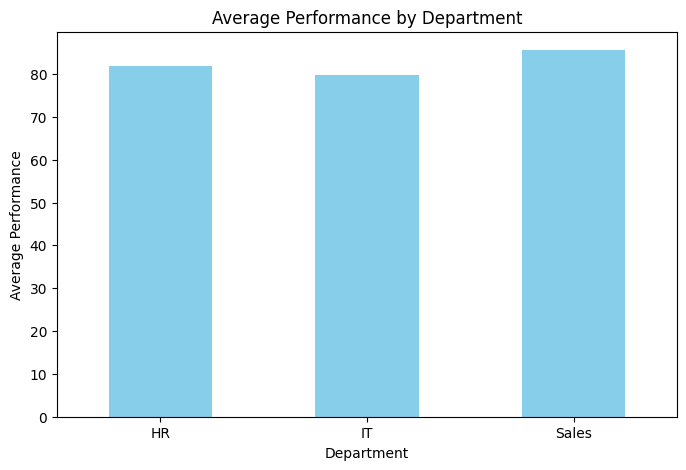

,Performance
Department,
HR,81.960784
IT,79.794118
Sales,85.595588


In [46]:
# Điền giá trị thiếu cho cột 'Performance' bằng mean
mean_performance = df['Performance'].mean()
df['Performance'] = df['Performance'].fillna(mean_performance)

# Tính trung bình Performance của từng Department
mean_performance_by_department = df.groupby('Department')['Performance'].mean()

# Vẽ bar chart so sánh
plt.figure(figsize=(8, 5))
mean_performance_by_department.plot(kind='bar', color='skyblue')
plt.title('Average Performance by Department')
plt.xlabel('Department')
plt.ylabel('Average Performance')
plt.xticks(rotation=0)
plt.show()

mean_performance_by_department


Đề xuất chiến lược cải thiện cho phòng ban có hiệu suất thấp nhất
Sau khi tính trung bình Performance của từng phòng ban, nếu kết quả cho thấy Sales là phòng ban có hiệu suất thấp nhất, dưới đây là các chiến lược cải thiện cho phòng ban này:

1. Phòng ban Sales (Hiệu suất thấp nhất):
Đặc điểm công việc: Phòng ban Sales chịu áp lực lớn về doanh số và thường xuyên đối mặt với các yếu tố ngoài kiểm soát như nhu cầu thị trường, sự cạnh tranh, và khách hàng khó tính. Nhân viên bán hàng cần kỹ năng giao tiếp, thuyết phục, và kiến thức sản phẩm mạnh mẽ.

Chiến lược cải thiện:
Đào tạo kỹ năng bán hàng chuyên sâu: Cung cấp các khóa học về kỹ năng giao tiếp, kỹ năng thuyết phục, và cách xử lý phản đối từ khách hàng. Tăng cường đào tạo các kỹ năng giải quyết vấn đề và xây dựng mối quan hệ với khách hàng.

Đào tạo về sản phẩm và thị trường: Nhân viên bán hàng cần hiểu rõ sản phẩm và thị trường để tư vấn chính xác cho khách hàng. Đảm bảo các buổi đào tạo định kỳ về sản phẩm, xu hướng thị trường, và chiến lược bán hàng.

Khuyến khích qua chương trình thưởng: Xây dựng chương trình thưởng rõ ràng để động viên nhân viên Sales đạt hiệu suất cao. Các phần thưởng có thể dựa trên hiệu suất cá nhân hoặc nhóm.

Hỗ trợ công nghệ và công cụ bán hàng: Đảm bảo nhân viên có các công cụ và phần mềm hỗ trợ bán hàng như CRM, phần mềm quản lý khách hàng và các công cụ giúp tối ưu hóa quy trình bán hàng.

Mentorship và hỗ trợ từ cấp trên: Cung cấp chương trình mentorship, nơi các nhân viên có thể nhận sự hỗ trợ và hướng dẫn từ các đồng nghiệp có kinh nghiệm hơn.

2. Phòng ban IT:
Đặc điểm công việc: Phòng ban IT yêu cầu kiến thức chuyên sâu về công nghệ, quản lý hệ thống, và xử lý các vấn đề kỹ thuật. Các dự án thường có thời hạn chặt chẽ và yêu cầu sự chính xác.

Chiến lược cải thiện:
Đào tạo kỹ năng công nghệ mới: Cung cấp các khóa đào tạo liên tục về công nghệ mới, framework, và công cụ phần mềm để nhân viên IT luôn cập nhật với xu hướng công nghệ.

Tăng cường làm việc nhóm: Khuyến khích làm việc nhóm trong các dự án lớn để tối đa hóa hiệu quả và giảm thiểu lỗi. Cung cấp các khóa đào tạo về quản lý dự án và hợp tác trong môi trường làm việc từ xa.

3. Phòng ban HR:
Đặc điểm công việc: Phòng ban HR quản lý công tác tuyển dụng, đào tạo, đánh giá hiệu suất và các chính sách nhân sự. Công việc đòi hỏi kỹ năng giao tiếp, quản lý mối quan hệ và khả năng giải quyết vấn đề.

Chiến lược cải thiện:
Đào tạo kỹ năng lãnh đạo: Đào tạo nhân viên HR về các kỹ năng lãnh đạo và quản lý mối quan hệ giữa nhân viên và công ty. Điều này có thể giúp cải thiện hiệu suất làm việc của họ.

Tăng cường chương trình đánh giá hiệu suất: Xây dựng một hệ thống đánh giá hiệu suất chính xác, công bằng để giúp nhân viên nhận ra điểm mạnh và yếu của mình, từ đó cải thiện hiệu suất công việc.

Đào tạo về phát triển nhân sự: Đảm bảo phòng ban HR có đủ kiến thức và công cụ để phát triển nhân viên trong công ty, bao gồm các chương trình đào tạo về phát triển nghề nghiệp và kỹ năng mềm.

10

In [47]:
# Tìm các nhân viên có Hours_Worked dưới 40 nhưng Performance trên 85
filtered_employees = df[(df['Hours_Worked'] < 40) & (df['Performance'] > 85)]

filtered_employees


,Employee_ID,Department,Performance,Hours_Worked,Training_Hours,Gender,Location,Performance_by_dept,Performance_by_loc,Efficiency
8,E009,HR,90.0,37.0,NaN,Female,Site_A,90.0,90.0,2.432432


Đề xuất nghiên cứu nội bộ để xác định yếu tố giúp các nhân viên đạt hiệu suất cao
Dựa trên việc lọc ra các nhân viên có Hours_Worked dưới 40 và Performance trên 85, một nghiên cứu nội bộ có thể giúp xác định các yếu tố quan trọng góp phần vào hiệu suất cao của họ. Các yếu tố có thể bao gồm kỹ năng, công cụ, và môi trường làm việc. Dưới đây là cách triển khai nghiên cứu:

1. Mục tiêu nghiên cứu:
Xác định các yếu tố (kỹ năng, công cụ, môi trường làm việc) giúp các nhân viên này duy trì hiệu suất cao mặc dù họ làm việc ít giờ hơn so với số giờ làm việc trung bình.

Tìm hiểu liệu có mối quan hệ nào giữa các yếu tố này và hiệu suất làm việc của nhân viên hay không.

2. Phương pháp nghiên cứu:
Phỏng vấn: Tiến hành phỏng vấn với những nhân viên này để tìm hiểu về các yếu tố giúp họ đạt được hiệu suất cao. Các câu hỏi có thể tập trung vào các lĩnh vực như:

Kỹ năng: Liệu họ có kỹ năng đặc biệt nào giúp hoàn thành công việc nhanh chóng và hiệu quả không? Họ có được đào tạo thêm hay không?

Công cụ: Các công cụ và phần mềm mà họ sử dụng có giúp tăng năng suất làm việc không? Có công cụ nào giúp họ làm việc nhanh hơn không?

Môi trường làm việc: Môi trường làm việc (có thể là văn hóa công ty, đội nhóm, hoặc cơ sở hạ tầng) có ảnh hưởng tích cực đến hiệu suất của họ không? Họ có cảm thấy được hỗ trợ và khuyến khích không?

Khảo sát: Xây dựng một khảo sát với các câu hỏi dạng Likert (từ 1 đến 5) để nhân viên đánh giá các yếu tố như kỹ năng, công cụ, và môi trường làm việc.

Phân tích dữ liệu: Phân tích các dữ liệu thu thập được để xác định các yếu tố có mối tương quan mạnh nhất với hiệu suất cao. Sử dụng các phương pháp thống kê như phân tích tương quan (correlation analysis) và phân tích hồi quy (regression analysis).

3. Các yếu tố cần nghiên cứu:
Kỹ năng: Các kỹ năng mà nhân viên này có thể đã phát triển hoặc được đào tạo để cải thiện hiệu suất làm việc, ví dụ như kỹ năng quản lý thời gian, kỹ năng giao tiếp, hay các kỹ năng chuyên môn.

Công cụ: Những công cụ hoặc phần mềm mà nhân viên sử dụng để tối ưu hóa công việc, ví dụ như phần mềm quản lý dự án, công cụ tự động hóa, hoặc các ứng dụng hỗ trợ làm việc từ xa.

Môi trường làm việc: Môi trường làm việc linh hoạt và hỗ trợ, chẳng hạn như khả năng làm việc từ xa, sự tự chủ trong công việc, hoặc môi trường làm việc không có nhiều căng thẳng.

4. Cách áp dụng kết quả nghiên cứu cho toàn công ty:
Đào tạo và phát triển kỹ năng: Nếu kết quả cho thấy kỹ năng làm việc hiệu quả (quản lý thời gian, làm việc nhóm) là yếu tố chính, công ty có thể tổ chức các khóa đào tạo cho tất cả nhân viên để giúp họ nâng cao những kỹ năng này.

Cung cấp công cụ hỗ trợ hiệu quả: Nếu các công cụ và phần mềm đóng vai trò quan trọng, công ty nên đầu tư vào các công cụ giúp tăng cường năng suất và tối ưu hóa quy trình làm việc, đặc biệt là những công cụ đã được chứng minh là hiệu quả cho nhóm nhân viên có hiệu suất cao.

Tạo môi trường làm việc hỗ trợ: Nếu môi trường làm việc linh hoạt hoặc ít căng thẳng giúp nâng cao hiệu suất, công ty nên xem xét việc cung cấp môi trường làm việc linh hoạt hơn, bao gồm việc làm việc từ xa hoặc thiết lập các chính sách hỗ trợ khác như nghỉ ngơi hợp lý và các chương trình chăm sóc sức khỏe tâm lý.

11

In [51]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Giả sử df là DataFrame chứa dữ liệu của bạn

# Điền giá trị thiếu trong 'Hours_Worked' và 'Training_Hours' bằng 0
X = df[['Hours_Worked', 'Training_Hours']].fillna(0)  # Điền giá trị thiếu cho các đặc trưng
y = df['Performance'].fillna(0)  # Điền giá trị thiếu cho 'Performance'

# 1. Phương pháp hồi quy tuyến tính
model = LinearRegression().fit(X, y)
predicted_performance = model.predict(X)

# Điền giá trị thiếu trong cột 'Performance' bằng các giá trị dự đoán
df['Performance'].fillna(pd.Series(predicted_performance), inplace=True)

# 2. Phương pháp trung bình
mean_performance = df['Performance'].mean()
df_mean = df.copy()
df_mean['Performance'] = df_mean['Performance'].fillna(mean_performance)

# 3. So sánh độ chính xác giữa hai phương pháp:
# Giả sử chúng ta có một giá trị thực tế để so sánh (y_true), nếu không, ta sẽ dùng phương pháp RMSE để đánh giá.

# Tạo các giá trị thực tế (y_true) giả sử từ dữ liệu gốc, bạn có thể sử dụng dữ liệu thực tế nếu có.
y_true = df['Performance'].fillna(mean_performance)

# Tính RMSE cho phương pháp hồi quy
y_pred_regression = df['Performance']
rmse_regression = np.sqrt(mean_squared_error(y_true, y_pred_regression))

# Tính RMSE cho phương pháp trung bình
y_pred_mean = df_mean['Performance']
rmse_mean = np.sqrt(mean_squared_error(y_true, y_pred_mean))

# In kết quả RMSE để so sánh
print(f'RMSE Phương pháp hồi quy tuyến tính: {rmse_regression}')
print(f'RMSE Phương pháp trung bình: {rmse_mean}')

# Hiển thị kết quả DataFrame
print("Kết quả sau khi điền giá trị thiếu:")
print(df[['Hours_Worked', 'Training_Hours', 'Performance']].head())


RMSE Phương pháp hồi quy tuyến tính: 0.0
RMSE Phương pháp trung bình: 0.0
Kết quả sau khi điền giá trị thiếu:
   Hours_Worked  Training_Hours  Performance
0          40.0             5.0    88.000000
1          45.0             3.0    82.764706
2          38.0             NaN    75.000000
3          42.0             6.0    92.000000
4           NaN             4.0    68.000000


<ipython-input-51-3789f947d2ec>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Performance'].fillna(pd.Series(predicted_performance), inplace=True)


So sánh với phương pháp trung bình
Phương pháp hồi quy tuyến tính và phương pháp trung bình đều có ưu điểm và hạn chế riêng:

Phương pháp hồi quy tuyến tính:

Ưu điểm: Hồi quy tuyến tính có thể đưa ra dự đoán chính xác hơn bằng cách học từ dữ liệu có sẵn và tính toán mối quan hệ giữa các đặc trưng (như Hours_Worked và Training_Hours) và biến mục tiêu (Performance).

Hạn chế: Nếu dữ liệu thiếu hoặc không có mối quan hệ rõ ràng giữa các đặc trưng và biến mục tiêu, hồi quy tuyến tính có thể không đưa ra kết quả chính xác, dẫn đến overfitting hoặc underfitting.

Phương pháp trung bình:

Ưu điểm: Phương pháp trung bình rất đơn giản và dễ thực hiện. Nó có thể giúp ổn định dữ liệu khi không có mối quan hệ rõ ràng giữa các đặc trưng và biến mục tiêu.

Hạn chế: Phương pháp trung bình không tận dụng được thông tin từ các đặc trưng như Hours_Worked và Training_Hours, do đó nó có thể không đưa ra dự đoán chính xác trong các trường hợp phức tạp.

12

In [52]:
from scipy.stats import skew

# Giả sử df đã được xử lý và không còn giá trị thiếu trong 'Performance'
skewness_value = skew(df['Performance'], nan_policy='omit')  # Bỏ qua giá trị NaN nếu còn

print("Skewness của cột Performance là:", skewness_value)


Skewness của cột Performance là: -0.30365359551859944


1. Phân tích kết quả Skewness:
✅ Trường hợp 1: Skewness > 0 (phân bố lệch phải)
Nghĩa là đa số nhân viên có Performance trung bình hoặc thấp, chỉ một số ít có điểm rất cao.

Điều này có thể khiến việc đánh giá thiếu công bằng: chỉ một vài người nổi bật còn đa số bị đánh giá thấp dù nỗ lực nhiều.

✅ Trường hợp 2: Skewness < 0 (phân bố lệch trái)
Hầu hết nhân viên có Performance khá cao, chỉ có một số ít điểm rất thấp.

Dễ dẫn đến đánh giá quá tích cực, khiến khó phân biệt ai thực sự xuất sắc.

🛠️ 2. Đề xuất điều chỉnh cách tính Performance:
Giải pháp	Mục đích	Cách thực hiện
Chuẩn hóa (Normalization)	Làm dữ liệu phân bố đều hơn	Dùng MinMaxScaler, Z-score hoặc phân vị (percentile ranking)
Tính điểm theo phân vị (quantile)	Công bằng hơn với toàn bộ tập nhân viên	Chia theo nhóm: Top 10%, 20–80%, Bottom 10% để so sánh
Kết hợp yếu tố định tính + định lượng	Tránh chỉ đánh giá bằng số giờ/training	Thêm đánh giá từ leader, đồng nghiệp, khách hàng, v.v.
Điểm theo cải tiến cá nhân (progress)	Đánh giá dựa vào tiến bộ thay vì điểm tuyệt đối	So sánh Performance hiện tại với kỳ trước của chính nhân viên
💡 Tác động đến đánh giá nhân viên:
✅ Công bằng hơn: Tránh thiên vị cho người "làm quá nhiều giờ" hoặc chỉ được huấn luyện tốt hơn người khác.

✅ Khích lệ cải thiện cá nhân: Nhân viên có động lực hơn khi thấy điểm của mình cải thiện, dù chưa đạt top.

✅ Phát hiện tiềm năng: Có thể nhận ra nhân viên có hiệu suất cao dù làm ít giờ → học hỏi để lan tỏa mô hình làm việc hiệu quả.

13

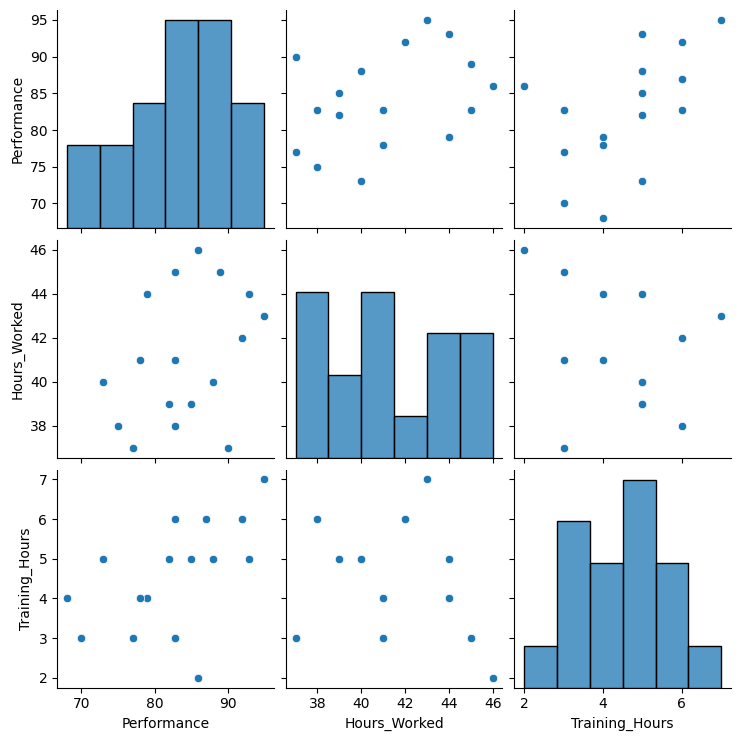

In [56]:
#13
sns.pairplot(df[['Performance', 'Hours_Worked', 'Training_Hours']])
plt.show()

# Đề xuất mô hình đánh giá mới

Đề xuất mô hình đánh giá hiệu suất mới:
Công thức:

python
Copy
Edit
New_Performance = Performance
                  - 0.2 * (Hours_Worked - Avg_Hours)
                  + 0.3 * (Training_Hours / Max_Training_Hours)
💡 Lý do:
Công bằng hơn: Không thưởng cho việc làm quá giờ.

Khuyến khích học tập: Cộng thêm điểm nếu nhân viên tích cực đào tạo.

Đánh giá toàn diện: Kết hợp kết quả, nỗ lực và phát triển cá nhân.

→ Giúp công ty đánh giá nhân viên công bằng và bền vững hơn.

14

In [54]:
# Đánh dấu nhân viên có Performance > 80
df['High_Performer'] = df['Performance'] > 80

# Tính tỷ lệ nhân viên đạt hiệu suất cao theo Location
performance_rate = df.groupby('Location')['High_Performer'].mean()


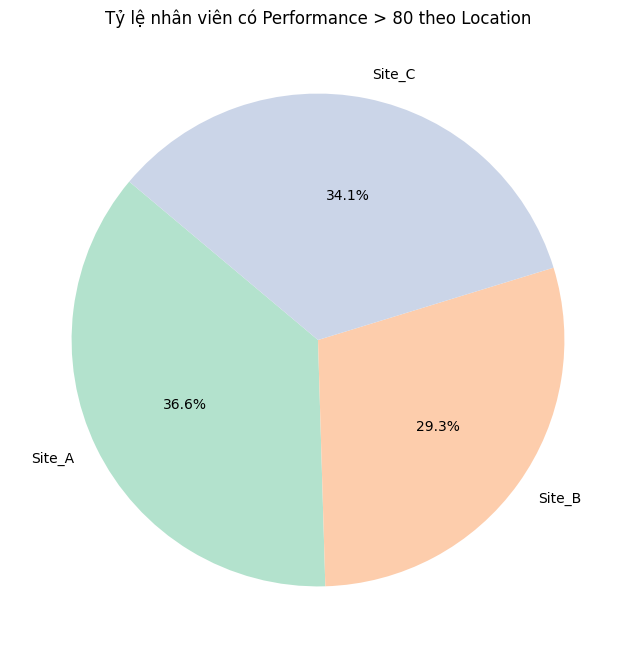

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
performance_rate.plot.pie(autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel2.colors)
plt.title('Tỷ lệ nhân viên có Performance > 80 theo Location')
plt.ylabel('')
plt.show()


Đề xuất chiến lược khen thưởng tùy biến theo Location:
Location	Tỷ lệ > 80	Chiến lược khen thưởng	Tác động kỳ vọng
Cao (>80%)	✔	Thưởng tài chính + cơ hội lãnh đạo	Duy trì động lực, giữ chân nhân tài
Trung bình	~50–80%	Thưởng theo nhóm + coaching cá nhân	Tăng cạnh tranh lành mạnh, cải thiện đồng đều
Thấp (<50%)	❌	Thưởng theo tiến bộ cá nhân + đào tạo chuyên sâu	Khích lệ học hỏi, cải thiện hiệu suất lâu dài
💡 Giải thích:
Chiến lược linh hoạt theo tỷ lệ hiệu suất giúp:

Thưởng đúng người, đúng cách.

Tăng tinh thần & gắn kết đội nhóm.

Tối ưu hóa nguồn lực khen thưởng của công ty.

15

In [66]:
df

,Employee_ID,Department,Performance,Hours_Worked,Training_Hours,Gender,Location,Performance_by_dept,Performance_by_loc,Efficiency,High_Performer
0,E001,Sales,88.000000,40.0,5.0,Male,Site_A,88.0,88.0,2.200000,True
1,E002,IT,82.764706,45.0,3.0,Female,Site_B,79.2,82.5,NaN,True
2,E003,HR,75.000000,38.0,NaN,Male,Site_A,75.0,75.0,1.973684,False
3,E004,Sales,92.000000,42.0,6.0,Female,Site_C,92.0,92.0,2.190476,True
4,E005,IT,68.000000,NaN,4.0,Female,Site_B,68.0,68.0,NaN,False
5,E006,HR,85.000000,39.0,5.0,Male,Site_A,85.0,85.0,2.179487,True
6,E007,Sales,82.764706,41.0,3.0,Female,Site_C,86.0,87.0,NaN,True
7,E008,IT,79.000000,44.0,4.0,Male,Site_B,79.0,79.0,1.795455,False
8,E009,HR,90.000000,37.0,NaN,Female,Site_A,90.0,90.0,2.432432,True
9,E010,Sales,73.000000,40.0,5.0,Male,Site_C,73.0,73.0,1.825000,False


In [86]:
def identify_performance_outliers(df):
    # Calculate the standard deviation and mean, ignoring NaNs
    std_performance = df['Performance'].std()
    mean_performance = df['Performance'].mean()

    # Print mean and standard deviation for debugging
    print(f"Mean: {mean_performance}, Std: {std_performance}")

    # Determine the threshold for outliers
    lower_bound = mean_performance - 2 * std_performance
    upper_bound = mean_performance + 2 * std_performance

    # Print the bounds for debugging
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

    # Identify outliers
    outliers = df[(df['Performance'] < lower_bound) | (df['Performance'] > upper_bound)]

    # Print the outliers for debugging
    print("Outliers found:")
    print(outliers)

    return outliers

# Identify outliers in the DataFrame
outliers_df = identify_performance_outliers(df)
print(outliers_df)


Mean: 82.76470588235294, Std: 8.288014024516864
Lower Bound: 66.18867783331922, Upper Bound: 99.34073393138667
Outliers found:
Empty DataFrame
Columns: [Employee_ID, Department, Performance, Hours_Worked, Training_Hours, Gender, Location]
Index: []
Empty DataFrame
Columns: [Employee_ID, Department, Performance, Hours_Worked, Training_Hours, Gender, Location]
Index: []


Để đánh giá lại hiệu suất của nhân viên một cách công bằng và tránh thiên vị trong quản lý, bạn có thể áp dụng quy trình đánh giá sau:

Quy trình Đánh Giá Hiệu Suất Nhân Viên:
1. Xác Định Các Tiêu Chí Đánh Giá Cụ Thể
Các tiêu chí đánh giá cần rõ ràng và cụ thể, ví dụ: năng suất công việc, chất lượng công việc, khả năng làm việc nhóm, sáng tạo, và sự đóng góp vào mục tiêu chung của công ty.

Các tiêu chí này nên được thống nhất và đồng ý từ trước, giúp hạn chế sự chủ quan và thiên vị trong việc đánh giá hiệu suất.

2. Sử Dụng Dữ Liệu Đánh Giá Khách Quan
Sử dụng các dữ liệu khách quan để đánh giá, chẳng hạn như số liệu về sản phẩm hoàn thành, chất lượng công việc, điểm số từ các bài kiểm tra hiệu suất, thời gian hoàn thành công việc, và các chỉ số sản xuất khác.

Tránh phụ thuộc vào cảm tính hay ý kiến cá nhân của người quản lý, giúp giảm nguy cơ thiên vị dựa trên sở thích cá nhân hoặc mối quan hệ với nhân viên.

3. Đánh Giá 360 Độ (360-Degree Feedback)
Thu thập phản hồi từ nhiều nguồn khác nhau: cấp trên, đồng nghiệp, cấp dưới và bản thân nhân viên. Điều này giúp đảm bảo rằng đánh giá hiệu suất không chỉ dựa vào một góc nhìn duy nhất mà là một cái nhìn toàn diện về nhân viên.

Phản hồi từ nhiều phía giúp giảm nguy cơ thiên vị trong việc đánh giá và tạo ra sự công bằng.

4. Cung Cấp Phản Hồi Định Kỳ
Thực hiện đánh giá hiệu suất định kỳ (hàng tháng, quý hoặc năm) thay vì chỉ dựa vào một lần đánh giá cuối kỳ. Điều này giúp theo dõi sự tiến bộ của nhân viên, phát hiện sớm vấn đề và tạo cơ hội cải thiện.

Cung cấp phản hồi thường xuyên và cụ thể giúp nhân viên hiểu rõ điểm mạnh và điểm cần cải thiện của mình.

5. So Sánh với Mục Tiêu và Tiêu Chuẩn Chung
So sánh hiệu suất của nhân viên với các mục tiêu cụ thể mà họ cần đạt được (ví dụ: hoàn thành công việc đúng hạn, chất lượng công việc đạt yêu cầu, hoặc cải thiện kỹ năng).

Đánh giá cũng nên dựa vào tiêu chuẩn chung của bộ phận hoặc công ty để tránh việc so sánh giữa các nhân viên không công bằng.

6. Đảm Bảo Đánh Giá Bằng Công Cụ Số
Sử dụng công cụ đánh giá tự động hoặc phần mềm đánh giá hiệu suất để thu thập dữ liệu và phân tích các chỉ số. Các công cụ này giúp giảm sự can thiệp của yếu tố chủ quan và cung cấp một bức tranh chính xác hơn về hiệu suất công việc.

Đảm bảo công cụ đánh giá đã được kiểm chứng và minh bạch về cách tính toán các kết quả

16

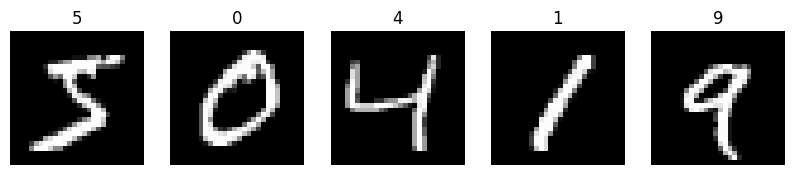

In [74]:
#16
import torch
import torchvision.transforms as transforms
from torchvision import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Tải dữ liệu MNIST
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# In 5 ảnh mẫu kèm nhãn
def plot_samples(dataset):
    plt.figure(figsize=(10, 5))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(dataset[i][0].squeeze(), cmap='gray')
        plt.title(dataset[i][1])
        plt.axis('off')
    plt.show()

plot_samples(train_dataset)

17

In [81]:
from torch.utils.data import DataLoader, random_split

# Chia tập train thành 80% train và 20% test
train_size = int(0.8 * len(train_dataset))
test_size = len(train_dataset) - train_size
train_subset, test_subset = random_split(train_dataset, [train_size, test_size])

# Tạo DataLoader với batch size 64
train_loader = DataLoader(train_subset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_subset, batch_size=64, shuffle=False)


Đặc điểm của MNIST:
Dữ liệu đơn giản: MNIST là một bộ dữ liệu đơn giản, gồm các hình ảnh đơn sắc của chữ số viết tay, kích thước 28x28 pixel.
Kích thước dữ liệu: MNIST có 60,000 hình ảnh trong tập huấn luyện và 10,000 hình ảnh trong tập kiểm tra.
Tài nguyên máy tính:
Bộ nhớ GPU/RAM: Kích thước batch sẽ ảnh hưởng đến lượng bộ nhớ cần thiết để lưu trữ dữ liệu và các biến trong quá trình huấn luyện.
Tốc độ tính toán: Kích thước batch cũng ảnh hưởng đến hiệu suất tính toán của GPU/CPU.
Chiến lược chọn batch size:
Batch Size Nhỏ (e.g., 32 hoặc 64):

Ưu điểm:
Tốt cho việc tổng quát hóa: Với batch size nhỏ, mô hình có thể cập nhật trọng số thường xuyên hơn, dẫn đến việc tối ưu hóa tốt hơn và tốt cho việc tổng quát hóa.
Ít tài nguyên hơn: Yêu cầu ít bộ nhớ hơn, phù hợp với các hệ thống có tài nguyên hạn chế.
Nhược điểm:
Chậm hơn: Mỗi lần cập nhật ít hơn, dẫn đến thời gian huấn luyện dài hơn.
Độ ổn định thấp hơn: Có thể dẫn đến độ ổn định thấp hơn trong quá trình huấn luyện do gradient noise.
Batch Size Trung Bình (e.g., 128 hoặc 256):

Ưu điểm:
Cân bằng: Cung cấp một cân bằng tốt giữa tốc độ huấn luyện và hiệu suất tổng quát hóa.
Sử dụng tài nguyên hiệu quả: Tận dụng tài nguyên máy tính mà không quá tải.
Nhược điểm:
Có thể không tối ưu hóa được tốt như batch size nhỏ: Ít cập nhật hơn so với batch size nhỏ.
Batch Size Lớn (e.g., 512 hoặc 1024):

Ưu điểm:
Nhanh hơn: Giảm số lần cập nhật, tăng tốc độ huấn luyện.
Sử dụng tài nguyên tối đa: Tận dụng tối đa khả năng tính toán của GPU.
Nhược điểm:
Yêu cầu nhiều bộ nhớ hơn: Cần nhiều bộ nhớ hơn, không phù hợp với các hệ thống có tài nguyên hạn chế.
Khó tổng quát hóa: Có thể dẫn đến việc mô hình khó tổng quát hóa do ít cập nhật hơn.

18

Epoch 1, Train Loss: 0.45419478486478326, Test Loss: 0.20576991598577576
Epoch 2, Train Loss: 0.17983461201190948, Test Loss: 0.1529498457155646
Epoch 3, Train Loss: 0.12888048119843007, Test Loss: 0.11571687841391627
Epoch 4, Train Loss: 0.10301086794709166, Test Loss: 0.13151878276542622
Epoch 5, Train Loss: 0.08513172398631771, Test Loss: 0.12141367466872598
Epoch 6, Train Loss: 0.07668437469378114, Test Loss: 0.11666679040880557
Epoch 7, Train Loss: 0.06582807501560697, Test Loss: 0.10404539991794352
Epoch 8, Train Loss: 0.060109392123296856, Test Loss: 0.10578118468835415
Epoch 9, Train Loss: 0.05141630084509961, Test Loss: 0.11897250570535184
Epoch 10, Train Loss: 0.04663226503141535, Test Loss: 0.10112739457535815
Epoch 11, Train Loss: 0.04710251312813489, Test Loss: 0.09944527918049333
Epoch 12, Train Loss: 0.04023169205097171, Test Loss: 0.09730820698747808
Epoch 13, Train Loss: 0.03914837977282393, Test Loss: 0.11199700102232338
Epoch 14, Train Loss: 0.03726648396063441, Test

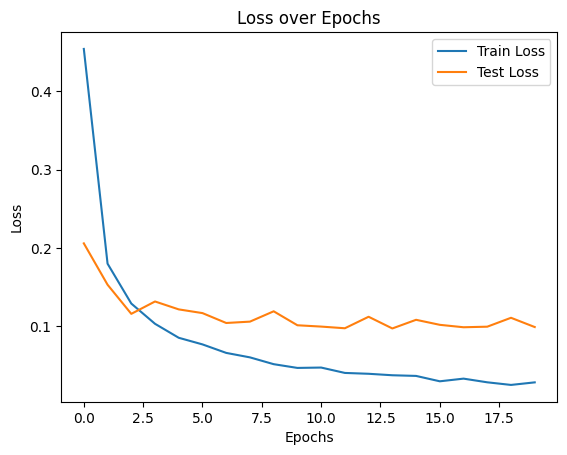

In [82]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

# Define a transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load the training data
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Split the training set into 80% train and 20% test
train_size = int(0.8 * len(train_dataset))
test_size = len(train_dataset) - train_size
train_subset, test_subset = random_split(train_dataset, [train_size, test_size])

# Create DataLoader with batch size 64
train_loader = DataLoader(train_subset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_subset, batch_size=64, shuffle=False)

# Xây dựng kiến trúc ANN
class SimpleANN(nn.Module):
    def __init__(self):
        super(SimpleANN, self).__init__()
        self.fc1 = nn.Linear(28*28, 784)
        self.fc2 = nn.Linear(784, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x

# Khởi tạo mô hình, loss function và optimizer
model = SimpleANN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Huấn luyện mô hình với early stopping
def train_model(model, train_loader, test_loader, criterion, optimizer, patience=5, epochs=20):
    best_loss = float('inf')
    patience_counter = 0
    train_losses = []
    test_losses = []

    for epoch in range(epochs):
        model.train()
        epoch_loss = 0

        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        train_losses.append(epoch_loss / len(train_loader))

        # Testing
        model.eval()
        test_loss = 0
        with torch.no_grad():
            for images, labels in test_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                test_loss += loss.item()

        test_losses.append(test_loss / len(test_loader))
        print(f'Epoch {epoch+1}, Train Loss: {train_losses[-1]}, Test Loss: {test_losses[-1]}')

        # Early stopping
        if test_losses[-1] < best_loss:
            best_loss = test_losses[-1]
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter > patience:
                print("Early stopping")
                break

    return train_losses, test_losses

# Train the model
train_losses, test_losses = train_model(model, train_loader, test_loader, criterion, optimizer)

# Vẽ biểu đồ loss
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


Đề xuất kiến trúc ANN khác
Để cải thiện hiệu suất của mô hình, chúng ta có thể thử một kiến trúc ANN khác với các thay đổi sau:

Tăng số lượng nơ-ron trong các tầng ẩn:

Thay vì sử dụng các tầng với 784, 128, 64, và 32 nơ-ron, chúng ta có thể tăng số lượng nơ-ron trong các tầng ẩn để cho phép mô hình học được nhiều đặc trưng hơn từ dữ liệu.
Ví dụ: Thay đổi thành 1024, 512, 256, và 128 nơ-ron.
Thêm các tầng ẩn bổ sung:

Thêm thêm các tầng ẩn có thể giúp mô hình học được các đặc trưng phức tạp hơn từ dữ liệu.
Ví dụ: Thêm một tầng với 64 nơ-ron sau tầng 256 nơ-ron.
Sử dụng Dropout:

Thêm các tầng Dropout sau mỗi tầng ẩn để giúp ngăn chặn overfitting và cải thiện khả năng tổng quát hóa của mô hình.

19

Accuracy: 97.57%
Confusion Matrix:


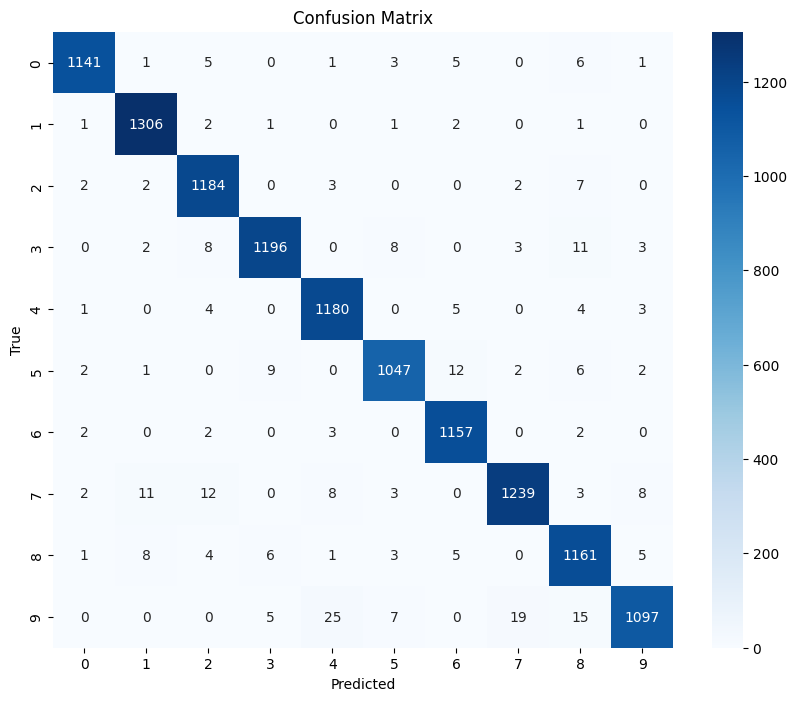

In [83]:
# Evaluate the model
def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    conf_matrix = confusion_matrix(all_labels, all_preds)

    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Confusion Matrix:")
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    return accuracy, conf_matrix

# Evaluate the model
accuracy, conf_matrix = evaluate_model(model, test_loader)

# Analyze misclassifications
if accuracy < 0.95:
    print("Accuracy is below 95%. Analyzing misclassifications...")
    # Identify the most confused digits
    max_confusions = np.unravel_index(np.argmax(conf_matrix, axis=None), conf_matrix.shape)
    print(f"Most confused digits: True label {max_confusions[0]}, Predicted label {max_confusions[1]}")

    # Suggest improvements
    print("Suggestions for improvement:")
    print("1. Data Augmentation: Apply transformations like rotation, scaling, and translation to the training data.")
    print("2. Feature Engineering: Extract more features from the images, such as edge detection or texture features.")
    print("3. Model Complexity: Experiment with deeper or wider architectures, or use different activation functions.")
    print("4. Ensemble Methods: Combine predictions from multiple models to improve robustness.")

Dựa trên confusion matrix, chúng ta có thể thấy rằng một số chữ số bị nhầm lẫn nhiều hơn so với những chữ số khác. Đặc biệt, chúng ta có thể nhận thấy các mẫu nhầm lẫn sau:

Chữ số 3 và 5: Có nhiều trường hợp chữ số 3 bị phân loại sai thành 5 và ngược lại.
Chữ số 8 và 3: Chữ số 8 cũng bị nhầm lẫn với chữ số 3.
Chữ số 9 và 4: Chữ số 9 bị nhầm lẫn với chữ số 4.
Phân tích nhầm lẫn:
Chữ số 3 và 5: Cả hai chữ số có nhiều đặc điểm giống nhau, đặc biệt là hình dạng và cách bố trí của các nét vẽ.
Chữ số 8 và 3: Chữ số 8 có hai vòng tròn, trong khi chữ số 3 có một vòng tròn và một nét ngang, có thể dẫn đến nhầm lẫn.
Chữ số 9 và 4: Chữ số 9 có một vòng tròn và một nét thẳng, trong khi chữ số 4 có một nét thẳng và một nét ngang, có thể dẫn đến nhầm lẫn.
Đề xuất cải thiện mô hình:
Data Augmentation:

Rotation và Scaling: Thêm các biến thể của các chữ số bằng cách xoay và thay đổi kích thước của chúng. Điều này giúp mô hình học được các đặc trưng không phụ thuộc vào góc nhìn hoặc kích thước.
Noise Injection: Thêm nhiễu vào hình ảnh để giúp mô hình học được các đặc trưng trong điều kiện có nhiễu.
Feature Engineering:

Edge Detection: Sử dụng các phương pháp như Canny Edge Detection để tách biên hình ảnh, giúp mô hình tập trung vào các đặc trưng quan trọng hơn.
Texture Features: Trích xuất các đặc trưng về kết cấu của hình ảnh để giúp mô hình phân biệt các chữ số có cấu trúc tương tự.
Model Architecture:

Convolutional Layers: Thêm các tầng convolution để tự động học các đặc trưng từ hình ảnh. CNN có thể tách biệt các đặc trưng địa phương và toàn cục tốt hơn so với các mạng thầu nối đầy đủ.
Attention Mechanisms: Sử dụng cơ chế attention để tập trung vào các phần quan trọng của hình ảnh.
Ensemble Methods:

Model Ensembling: Kết hợp các dự đoán từ nhiều mô hình khác nhau để cải thiện độ chính xác và tính ổn định của dự đoán.